In [ ]:
column_explain = '/content/drive/MyDrive/Colab Notebooks/Section2_Project/TNM/K-드라마 프로그램 출연진정보 채_컬럼정의서.xlsx'
data0_url = '/content/drive/MyDrive/Colab Notebooks/Section2_Project/TNM/TN_K_DRAMA_CST_AUDERT_INFO_202109.csv'
data1_url = '/content/drive/MyDrive/Colab Notebooks/Section2_Project/TNM/TN_K_DRAMA_CST_AUDERT_INFO_202110.csv'
data2_url = '/content/drive/MyDrive/Colab Notebooks/Section2_Project/TNM/TN_K_DRAMA_CST_AUDERT_INFO_202111.csv'
test_url = '/content/drive/MyDrive/Colab Notebooks/Section2_Project/TNM/TN_K_DRAMA_CST_AUDERT_INFO_202112.csv'

In [ ]:
# xlsx 파일을 불러오기위해서 xlrd를 최신 버전으로 업그레이드 해준다. #다른 것들도 다 install 
! pip install --upgrade xlrd
! pip install shap
! pip install pdpbox
! pip install eli5
! pip install category_encoders

In [ ]:
import pandas as pd
import openpyxl
import xlrd

column_explain = pd.read_excel(column_explain)

In [ ]:
column_explain

,순서,컬럼영문명,컬럼한글명,데이터타입,길이,PK여부,NOT NULL여부
0,1,BRDCST_DE,방송일자,VARCHAR,8,Y,Y
1,2,BRDCST_END_DE,방송종료일자,VARCHAR,8,Y,Y
2,3,CHNNEL_NM,채널명,VARCHAR,200,Y,Y
3,4,PROGRM_BEGIN_TIME,프로그램시작시간,VARCHAR,6,Y,Y
4,5,PROGRM_END_TIME,프로그램종료시간,VARCHAR,6,N,Y
5,6,PROGRM_NM,프로그램명,VARCHAR,200,N,Y
6,7,PROGRM_DC,프로그램설명,VARCHAR,500,N,N
7,8,BRDCST_TME_NM,방송회차명,VARCHAR,200,N,N
8,9,PROGRM_BRDCST_AREA_NM,프로그램방송지역명,VARCHAR,200,N,Y
9,10,BRDCST_TIME,방송시간,VARCHAR,6,N,Y


In [ ]:
df0 = pd.read_csv(data0_url)
df0.info(), df0.head()
## 전체 4509

In [ ]:
df1 = pd.read_csv(data1_url)
df1.info(), df1.head()
## 전체 4819
df1['BRDCST_DE'].unique()

In [ ]:
df2 = pd.read_csv(data2_url)
df2.info(), df2.head()
## 전체 4711
df2['BRDCST_DE'].unique()

In [ ]:
test = pd.read_csv(test_url)
test.info(), test.head()
## 전체 5315
test['BRDCST_DE'].unique()

In [ ]:
# df0, df1, df2 모두 9, 10, 11월 값. test는 12월 값
# concat으로 합친 후, 중복 값 확인. 
df = pd.concat([df0, df1, df2], ignore_index = True)
df_ori = pd.concat([df0, df1, df2], ignore_index = True)

In [ ]:
print(len(df) == len(df1) + len(df2) + len(df0)) #정상적으로 합쳐짐.
df.info()

True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14039 entries, 0 to 14038
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BRDCST_DE                    14039 non-null  int64  
 1   BRDCST_END_DE                14039 non-null  int64  
 2   CHNNEL_NM                    14039 non-null  object 
 3   PROGRM_BEGIN_TIME            14039 non-null  int64  
 4   PROGRM_END_TIME              14039 non-null  int64  
 5   PROGRM_NM                    14039 non-null  object 
 6   PROGRM_DC                    168 non-null    object 
 7   BRDCST_TME_NM                13966 non-null  object 
 8   PROGRM_BRDCST_AREA_NM        14039 non-null  object 
 9   BRDCST_TIME                  14039 non-null  int64  
 10  PROGRM_GENRE_LCLAS_NM        14039 non-null  object 
 11  PROGRM_GENRE_MLSFC_NM        14039 non-null  object 
 12  PROGRM_GENRE_SCLAS_NM        14039 non-null  object 
 13  MALE_4_9YO_

In [ ]:
df.duplicated().sum() #중복 없음.

0

In [ ]:
## 특성을 엔지니어링 하는 함수 생성 ## 

def engineer(df):

  # begin time conver to 'A','B','C', etc. def
  def convert_time(x):
    if (x >= 000000) & (x <= 25959):
      return "A"
    if x >= 30000 and x <= 55959:
      return "B"
    if x >= 60000 and x <= 85959:
      return "C"
    if x >= 90000 and x <= 115959:
      return "D"
    if x >= 120000 and x <= 145959:
      return "E"
    if x >= 150000 and x <= 175959:
      return "F"
    if x >= 180000 and x <= 205959:
      return "G"
    if x >= 210000 and x <= 235959:
      return "H"
  df['PROGRM_BEGIN_TIME'] = df['PROGRM_BEGIN_TIME'].apply(convert_time)

  ## 컬럼명 변경
  df.rename(columns = {'BRDCST_DE' : 'date',
                     'CHNNEL_NM' : 'chanel',
                     'PROGRM_BEGIN_TIME' : 'time',
                     'PROGRM_NM' : 'name',
                     'PROGRM_GENRE_SCLAS_NM' : 'genre',
                     'MALE_N20S_WTCHNG_RT' : 'm_20',
                     'MALE_N30S_WTCHNG_RT' : 'm_30',
                     'FEMALE_N20S_WTCHNG_RT' : 'f_20',
                     'FEMALE_N30S_WTCHNG_RT' : 'f_30',
                     'CST_CN' : 'casting'}, inplace = True)
  ###컬럼삭제
  delete_columns = ['BRDCST_END_DE','PROGRM_DC', 'BRDCST_TME_NM', 
                  'PROGRM_BRDCST_AREA_NM','PROGRM_GENRE_LCLAS_NM', 
                  'PROGRM_GENRE_MLSFC_NM', 'PROGRM_END_TIME', 
                  'BRDCST_TIME', 'MALE_4_9YO_WTCHNG_RT',
                  'MALE_N10S_WTCHNG_RT', 'MALE_N40S_WTCHNG_RT',
                  'MALE_N50S_WTCHNG_RT','MALE_N60S_ABOVE_WTCHNG_RT',
                  'FEMALE_4_9YO_WTCHNG_RT','FEMALE_N10S_WTCHNG_RT',
                  'FEMALE_N40S_WTCHNG_RT','FEMALE_N50S_WTCHNG_RT',
                  'FEMALE_N60S_ABOVE_WTCHNG_RT', 'date']
  df.drop(columns = delete_columns, axis = 1, inplace=True)

  return df

In [ ]:
train = engineer(df)
test = engineer(test)

In [ ]:
train.head()

,chanel,time,name,genre,m_20,m_30,f_20,f_30,casting
0,KBS1,G,속아도꿈결,일일연속극,2.09781,3.07116,1.51997,3.11875,"금종화역:최정우,강모란역:박준금,금상백역:류진,인영혜역:박탐희,금상구역:임형준,오민..."
1,KBS2,D,속아도꿈결,일일연속극,0.22904,0.50181,0.33854,0.13986,"금종화역:최정우,강모란역:박준금,금상백역:류진,인영혜역:박탐희,금상구역:임형준,오민..."
2,KBS2,G,빨강구두,일일연속극,2.08174,4.12124,2.07667,4.97292,"민희경역:최명길,김진아역:소이현,윤기석역:박윤재,윤현석역:신정윤,권혜빈역:정유민,권..."
3,MBC,C,두번째남편,일일연속극,0.32441,0.38374,0.20008,0.78139,"봉선화역:엄현경,윤재민역:차서원,윤재경역:오승아,문상혁역:한기웅,주해란역:지수원,윤..."
4,MBC,G,두번째남편,일일연속극,0.31510,1.94320,0.41742,1.87828,"봉선화역:엄현경,윤재민역:차서원,윤재경역:오승아,문상혁역:한기웅,주해란역:지수원,윤..."


In [ ]:
train.shape, test.shape

((14039, 10), (5315, 10))

In [ ]:
target = 'm_30'
train, val = train_test_split(train, train_size = 0.8, test_size = 0.2, random_state = 2)

In [ ]:
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test.drop(columns=target)
y_test = test[target]

In [ ]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((11231, 9), (2808, 9), (11231,), (2808,))

In [ ]:
print(len(df.shape) == len(train.shape))

True


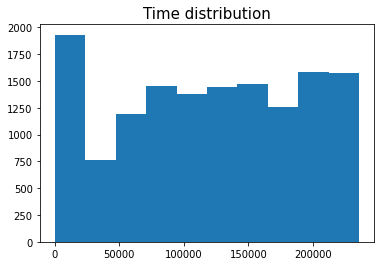

In [ ]:
import matplotlib.pyplot as plt
colors = ['#E76939', '#9B2B5A', '#E50E45', '#6D045E','#022A76', '#191232',
          '#F4B951', '#055156', '#A6D26A', '#13BC81','#252848', '#076F50']
plt.figure(figsize=(6,4))
plt.title('Time distribution', size = 15)
plt.hist(df_ori['PROGRM_BEGIN_TIME'])
plt.show()

In [ ]:
y_axis = X_train['time'].value_counts()
y_axis
x_axis = ['A', 'B', 'C', 'D','E','F','G','H']

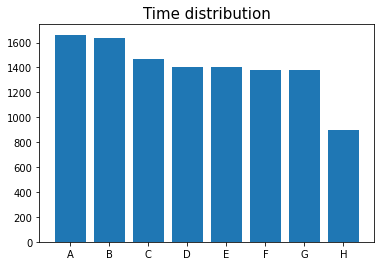

In [ ]:
plt.figure(figsize=(6,4))
plt.title('Time distribution', size = 15)
plt.bar(x_axis, y_axis)
plt.show()

In [ ]:
y_train.sort_values(ascending=False).describe()

count    11231.000000
mean         0.153702
std          0.519265
min          0.000000
25%          0.000000
50%          0.018400
75%          0.094365
max          8.133860
Name: m_30, dtype: float64

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


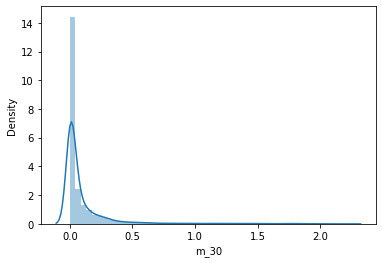

In [ ]:
import seaborn as sns
from scipy import stats
sns.distplot(np.log1p(y_train))

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


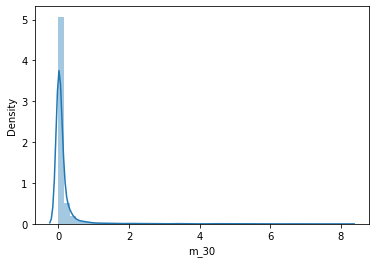

In [ ]:
sns.distplot((y_train))

In [ ]:
yy_train = df[df['m_30'] < np.percentile(df['m_30'], 99.5)]['m_30']
yy_train.describe()
df.shape

(14039, 10)

In [ ]:
yy_train = (y_train < np.percentile(y_train, 99.5))
yy_train = (yy_train > np.percentile(y_train, 99.5))

In [ ]:
yy_train

0        3.07116
1        0.50181
2        4.12124
3        0.38374
4        1.94320
          ...   
14034    0.00000
14035    0.00000
14036    0.00000
14037    0.02188
14038    0.15313
Name: m_30, Length: 13968, dtype: float64

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


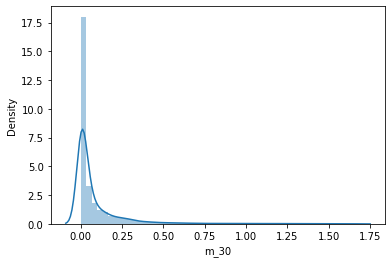

In [ ]:
sns.distplot(np.log1p(yy_train))

In [ ]:
y_train.isnull().sum()
y_train

12124    0.00838
4351     0.83864
9293     0.00753
5490     0.07578
5873     0.00000
          ...   
11798    0.23889
13896    0.09357
6637     0.02528
2575     0.01436
7336     0.00000
Name: m_30, Length: 11231, dtype: float64

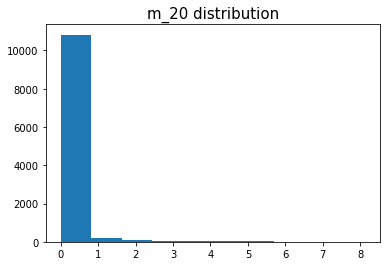

In [ ]:
import numpy as np 
plt.figure(figsize=(6,4))
plt.title('m_20 distribution', size = 15)
plt.hist(y_train)
plt.show()

In [ ]:
baseline = y_train.mean()
baseline

0.1537021556406375

In [ ]:
# 기준모델로 훈련 에러(MAE) 계산
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_pred = [baseline] * len(y_train)
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
print(f'MAE훈련 에러: {mae:.10f}')
print(f'MSE훈련 에러: {mse:.10f}')

MAE훈련 에러: 0.2082261675
MSE훈련 에러: 0.2696117100


In [ ]:
# 테스트 에러(MAE)
y_pred = [baseline] * len(y_test)
mae = mean_absolute_error(y_test, y_pred)
mae = mean_squared_error(y_test, y_pred)
print(f'MAE테스트 에러: {mae:.10f}')
print(f'MSE테스트 에러: {mse:.10f}')

MAE테스트 에러: 0.2330294951
MSE테스트 에러: 0.2696117100


In [ ]:
## LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, roc_auc_score
from category_encoders import OrdinalEncoder, OneHotEncoder, TargetEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from scipy.stats import randint, uniform
import warnings
warnings.filterwarnings("ignore")


scaled_columns = ['m_20', 'f_20', 'f_30']
scaler = MinMaxScaler().fit(X_train[scaled_columns])
pipeline = make_pipeline(
    TargetEncoder(cols = ['chanel', 'time', 'name', 'genre', 'casting']),
    RandomForestRegressor(n_jobs=-1)
    )

dists = { 
    'randomforestregressor__n_estimators': randint(50, 500),
    'randomforestregressor__max_depth': [5, 10, 15, 20, 25, None],
    'randomforestregressor__min_samples_leaf': [1, 2, 3, 4, 5, 6],
    'randomforestregressor__min_samples_split': [2, 3, 4, 5, 6, 7],
    }

clf = RandomizedSearchCV(
    pipeline,
    param_distributions= dists, 
    n_iter=8, 
    cv=5, 
    scoring='neg_mean_absolute_error',  
    verbose=1,
    refit=True,
    n_jobs=-2
    )

clf.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('targetencoder',
                                              TargetEncoder(cols=['chanel',
                                                                  'time',
                                                                  'name',
                                                                  'genre',
                                                                  'casting'])),
                                             ('randomforestregressor',
                                              RandomForestRegressor(n_jobs=-1))]),
                   n_iter=8, n_jobs=-2,
                   param_distributions={'randomforestregressor__max_depth': [5,
                                                                             10,
                                                                             15,
                                                                             20,
                

In [ ]:
print('MAE: ', -clf.best_score_)

MAE:  0.07592579194921573


In [ ]:
pipe = clf.best_estimator_
y_pred = pipe.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
print(f'테스트세트 MAE: {mae:,.10f}')
print(f'테스트세트 MSE: {mse:,.10f}')

테스트세트 MAE: 0.0837466234
테스트세트 MSE: 0.0296686259


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
scaled_columns = ['m_20', 'f_20', 'f_30']
MinMaxScaler().fit(X_train[scaled_columns])
encoder = OneHotEncoder(use_cat_names = True)
X_train = encoder.fit_transform(X_train)
# TargetEncoder().fit(X_train)
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
X_test = encoder.transform(X_test)

In [ ]:
y_pred = lr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
print(f'테스트세트 MAE: {mae:,.10f}')
print(f'테스트세트 MSE: {mse:,.10f}')

테스트세트 MAE: 50,744,869,989.9929656982
테스트세트 MSE: 11,532,465,538,338,996,092,928.0000000000


In [ ]:
lr.coef_, lr.intercept_

(array([-3.10184215e+08, -3.10184215e+08,  4.94113519e+10, -3.10184215e+08,
        -3.10184215e+08, -3.10184215e+08, -1.58927417e+11, -3.10184215e+08,
        -3.10184215e+08, -3.10184215e+08, -3.10184215e+08, -3.10184215e+08,
        -3.10184216e+08, -3.10184216e+08, -3.10184215e+08, -3.10184215e+08,
        -3.10184215e+08, -3.10184215e+08, -3.10184215e+08, -3.10184215e+08,
        -3.10184215e+08, -3.10184215e+08, -3.10184215e+08, -3.10184216e+08,
        -1.58927417e+11,  4.94113519e+10,  1.97541814e+11, -3.10184215e+08,
        -3.10184215e+08, -3.10184215e+08,  8.59886875e+10, -3.10184215e+08,
         4.36882012e+11,  4.94113519e+10, -3.10184215e+08, -3.10184215e+08,
         1.41070146e+12,  1.41070146e+12,  1.41070146e+12,  1.41070146e+12,
         1.41070146e+12,  1.41070146e+12,  1.41070146e+12,  1.41070146e+12,
        -1.15973151e+11,  2.00916186e+11,  1.57618063e+11,  4.29526174e+11,
         2.00032431e+11,  8.21030930e+11, -2.91515743e+11,  4.59597426e+10,
         1.9

In [ ]:
plt.plot

In [ ]:
import sklearn
import xgboost
import shap
from sklearn.model_selection import train_test_split